<a href="https://colab.research.google.com/github/C3578/review_SciPy/blob/master/review_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt

In [ ]:
y = np.random.random(10)

In [ ]:
y

array([0.08136174, 0.82663549, 0.10087037, 0.74000305, 0.29409804,
       0.86800254, 0.97531122, 0.115548  , 0.64103289, 0.37820263])

In [ ]:
x = np.arange(10)

In [ ]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

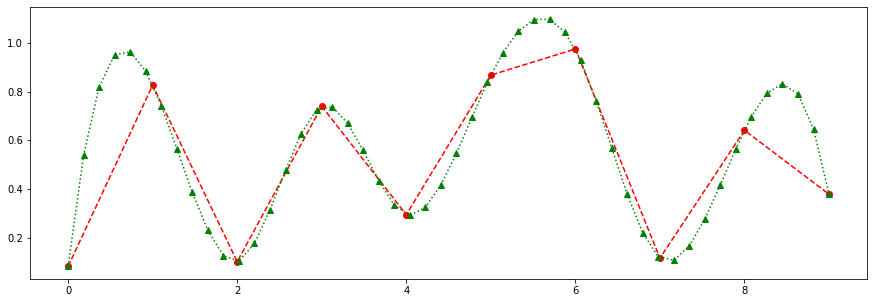

In [ ]:
#  Интерполяция кубическим полиномом на 50 точек.

new_x = np.linspace(x.min(), x.max(), 50)
new_y = sp.interpolate.interp1d(x, y, kind='cubic')(new_x)

plt.figure(figsize=(15,5))
plt.plot(x, y, 'ro--')
plt.plot(new_x, new_y, '^g:')
plt.show()

Интегрирование.
Функция Quad является рабочей лошадкой интеграционных функций SciPy. Численное интегрирование иногда называют квадратурным , отсюда и название. Обычно это выбор по умолчанию для выполнения одиночных интегралов функции f (x) в заданном фиксированном диапазоне от a до b.
Общая форма quad – это scipy.integrate.quad (f, a, b) , где «f» – это имя интегрируемой функции, «a» и «b» являются нижним и верхним пределами соответственно.

In [ ]:
import scipy.integrate      #  Импортируем библиотеку.

In [ ]:
#  Функция площадь под кривой которой, мы будем считать.

def func(x):
  return x**2

In [ ]:
y = func(np.arange(11))

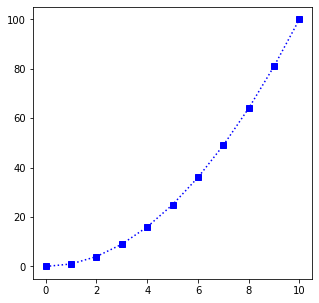

In [ ]:
#  Построим график функции.

plt.figure(figsize=(5,5))
plt.plot(y, 'bs:')
plt.show()

In [ ]:
i = scipy.integrate.quad(func, 0, 10)

In [ ]:
a = 'значением интеграла:' 
b = 'оценка абсолютной ошибки в значении интеграла:'
print(a, i[0])
print(b, i[1])

значением интеграла: 333.33333333333326
оценка абсолютной ошибки в значении интеграла: 3.700743415417188e-12


# Оптимизация. Поиск минимума.

Функция Розенброка — невыпуклая функция, используемая для оценки производительности алгоритмов оптимизации, предложенная Ховардом Розенброком  в 1960 году. Считается, что поиск глобального минимума для данной функции является нетривиальной задачей.


In [ ]:
#  Функция Розенброка, 3-х мерное пространство, построения графика.

def rosen_grid(x, y):
  return ((1-x)**2) + (100*(y-x**2)**2)

In [ ]:
#  Функция Розенброка, 3-х мерное пространство, поиск минимума.

def rosen(i):
  x, y = i
  return ((1-x)**2) + (100*(y-x**2)**2)

In [ ]:
x = np.linspace(-2, 2, 50)

In [ ]:
y = np.linspace(-1, 3, 50)

In [ ]:
xgrid, ygrid = np.meshgrid(x, y)      #  создает список массивов координатной сетки.

In [ ]:
xgrid.shape

(50, 50)

In [ ]:
zgrid = rosen_grid(xgrid, ygrid)

In [ ]:
zgrid.shape

(50, 50)

In [ ]:
from matplotlib import cm

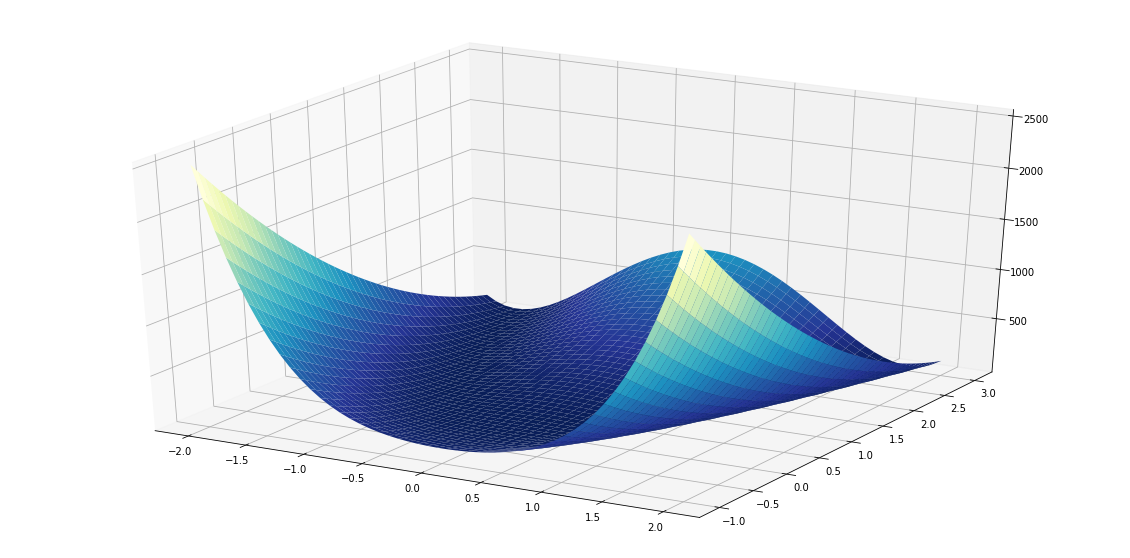

In [ ]:
#  Посмотрим на график функция Розенброка в 3D.

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, ygrid, zgrid, cmap=cm.YlGnBu_r)
#ax.legend()
plt.show()

In [ ]:
from scipy.optimize import minimize 

In [ ]:
#  Найдём минимум функции Розенброка.

x0 = [-1.0, -1.0]     #  Предположение о точке минимума.
minimize(rosen, x0, method='nelder-mead')

 final_simplex: (array([[0.99999886, 0.99999542],
       [0.99996261, 0.99992484],
       [0.9999812 , 0.99996926]]), array([5.30934392e-10, 1.41212609e-09, 5.05898700e-09]))
           fun: 5.309343918637161e-10
       message: 'Optimization terminated successfully.'
          nfev: 125
           nit: 67
        status: 0
       success: True
             x: array([0.99999886, 0.99999542])